In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML # for HTMl tag use in python

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [3]:
data=pd.read_csv('student_clustering.csv')

In [7]:
data.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [8]:
data.shape

(200, 2)

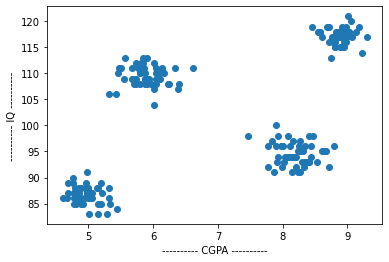

In [62]:
plt.scatter(data['cgpa'],data['iq'])
plt.xlabel('---------- CGPA ----------')
plt.ylabel('---------- IQ ----------')
plt.show()
# we can clearly see there 4 clusters but we can very with elbow method

In [22]:
from sklearn.cluster import KMeans

# this code we find how much cluster we need, thats called elbow method
wcss = []
for i in range(1,11):  # you can take 21 instead of 11 but, jurnally we take 11
    km = KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)
    
wcss

[29957.898287999997,
 4184.141269999999,
 2362.7133490000015,
 681.9696600000001,
 514.1616803171117,
 405.1205840691053,
 302.5473746759042,
 241.70118319588113,
 206.7223959399857,
 176.31140624367384]

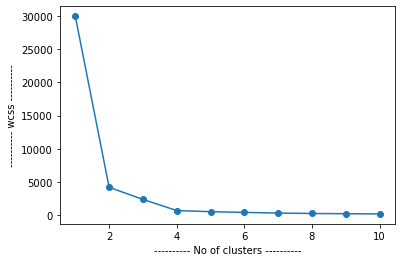

In [63]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('---------- No of clusters ----------')
plt.ylabel('---------- wcss ----------')
plt.show()
# you can clearly see 4th point have slope going change you we choose 4 its means we choose 4 clusters

In [30]:
x=data.iloc[:,:].values # data convert into array
km = KMeans(n_clusters=4) # we take 4 coz, above we verfiy that we should take 4 cluster
y_means = km.fit_predict(x)

In [32]:
y_means

array([2, 3, 0, 0, 3, 3, 0, 1, 3, 0, 2, 3, 0, 2, 3, 0, 3, 0, 3, 3, 0, 2,
       0, 2, 2, 0, 2, 1, 0, 3, 1, 3, 1, 3, 0, 0, 1, 3, 2, 3, 2, 0, 0, 2,
       1, 1, 0, 3, 1, 3, 2, 2, 1, 0, 1, 3, 3, 1, 3, 1, 3, 0, 0, 1, 2, 1,
       0, 2, 3, 0, 3, 1, 0, 2, 3, 1, 3, 1, 2, 0, 0, 1, 3, 2, 1, 2, 1, 3,
       1, 3, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 2, 0, 2, 1, 1,
       0, 1, 3, 3, 0, 1, 0, 3, 1, 2, 2, 3, 0, 1, 0, 2, 0, 3, 2, 0, 0, 3,
       2, 2, 3, 1, 3, 2, 0, 0, 0, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1,
       2, 0, 3, 1, 3, 0, 2, 1, 3, 0, 1, 2, 3, 2, 2, 1, 1, 3, 1, 2, 2, 0,
       1, 3, 2, 1, 1, 3, 3, 3, 0, 2, 0, 0, 1, 3, 0, 0, 2, 2, 0, 2, 1, 3,
       3, 1])

In [68]:
cluster_1 = pd.DataFrame({'cluster_1_CGPA':x[y_means == 0,0],'cluster_1_IQ':x[y_means == 0,1]})
cluster_1.sample(5)

,cluster_1_CGPA,cluster_1_IQ
25,8.67,95.0
47,8.40,93.0
15,8.14,94.0
41,8.35,93.0
19,8.53,93.0


In [66]:
cluster_2 = pd.DataFrame({'cluster_2_CGPA':x[y_means == 1,0],'cluster_2_IQ':x[y_means == 1,1]}) 
cluster_2.sample(5)

,cluster_2_CGPA,cluster_2_IQ
26,8.98,118.0
5,8.96,116.0
42,9.06,120.0
14,8.71,116.0
28,8.86,117.0


In [65]:
cluster_3 = pd.DataFrame({'cluster_3_CGPA':x[y_means == 2,0],'cluster_3_IQ':x[y_means == 2,1]})
cluster_3.sample(5)

,cluster_3_CGPA,cluster_3_IQ
0,5.13,88.0
24,4.76,90.0
9,5.31,86.0
30,4.77,86.0
40,4.67,86.0


In [64]:
cluster_4 = pd.DataFrame({'cluster_4_CGPA':x[y_means == 3,0],'cluster_4_IQ':x[y_means == 3,1]})
cluster_4.sample(5) 

,cluster_4_CGPA,cluster_4_IQ
48,5.85,112.0
24,5.47,111.0
30,5.74,108.0
23,5.81,112.0
44,5.97,108.0


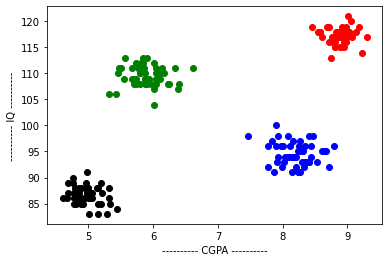

In [61]:
# combine all above 4 clusters into a scatter plot

plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color='blue')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],color='red')
plt.scatter(x[y_means == 2,0],x[y_means == 2,1],color='black')
plt.scatter(x[y_means == 3,0],x[y_means == 3,1],color='green')
plt.xlabel('---------- CGPA ----------')
plt.ylabel('---------- IQ ----------')
plt.show()